<a href="https://colab.research.google.com/github/Altalsof/-alura_store_challenge/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
# Calcular el ingreso total por tienda (suma de la columna 'Precio')
ingresos = {
    'Tienda 1 ': tienda1['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

# Mostramos los ingresos
for tienda, ingreso in ingresos.items():
    print(f"Ingresos totales {tienda}: ${ingreso:,.2f}")

Ingresos totales Tienda 1 : $1,150,880,400.00
Ingresos totales Tienda 2: $1,116,343,500.00
Ingresos totales Tienda 3: $1,098,019,600.00
Ingresos totales Tienda 4: $1,038,375,700.00


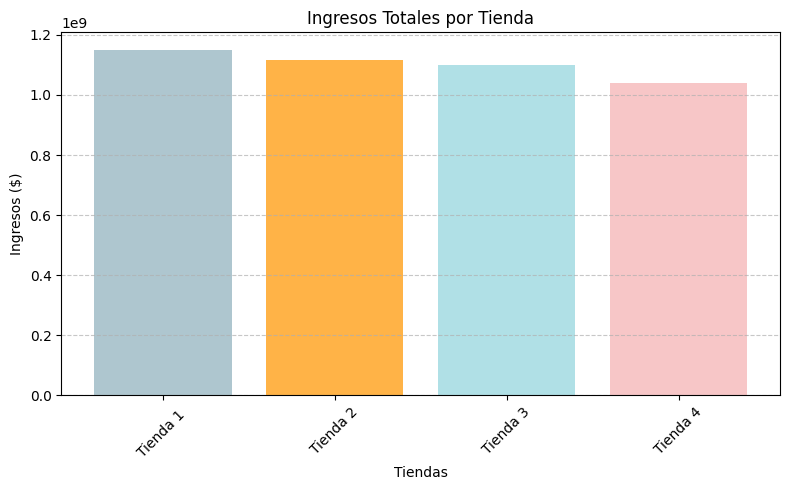

In [4]:
# Datos del gráfico
tiendas = list(ingresos.keys())
valores = list(ingresos.values())
colores = ['#AEC6CF', '#FFB347', '#B0E0E6', '#F7C6C7']

# Gráfico  de barras
plt.figure(figsize=(8, 5))
plt.bar(tiendas, valores, color=colores)
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# 2. Ventas por categoría

In [5]:
# Agrupar y contar por categoría para cada tienda
ventas_categoria_t1 = tienda1['Categoría del Producto'].value_counts()
ventas_categoria_t2 = tienda2['Categoría del Producto'].value_counts()
ventas_categoria_t3 = tienda3['Categoría del Producto'].value_counts()
ventas_categoria_t4 = tienda4['Categoría del Producto'].value_counts()

print("Ventas por categoría - Tienda 1:\n", ventas_categoria_t1, "\n")
print("Ventas por categoría - Tienda 2:\n", ventas_categoria_t2, "\n")
print("Ventas por categoría - Tienda 3:\n", ventas_categoria_t3, "\n")
print("Ventas por categoría - Tienda 4:\n", ventas_categoria_t4, "\n")

Ventas por categoría - Tienda 1:
 Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64 

Ventas por categoría - Tienda 2:
 Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64 

Ventas por categoría - Tienda 3:
 Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64 

V

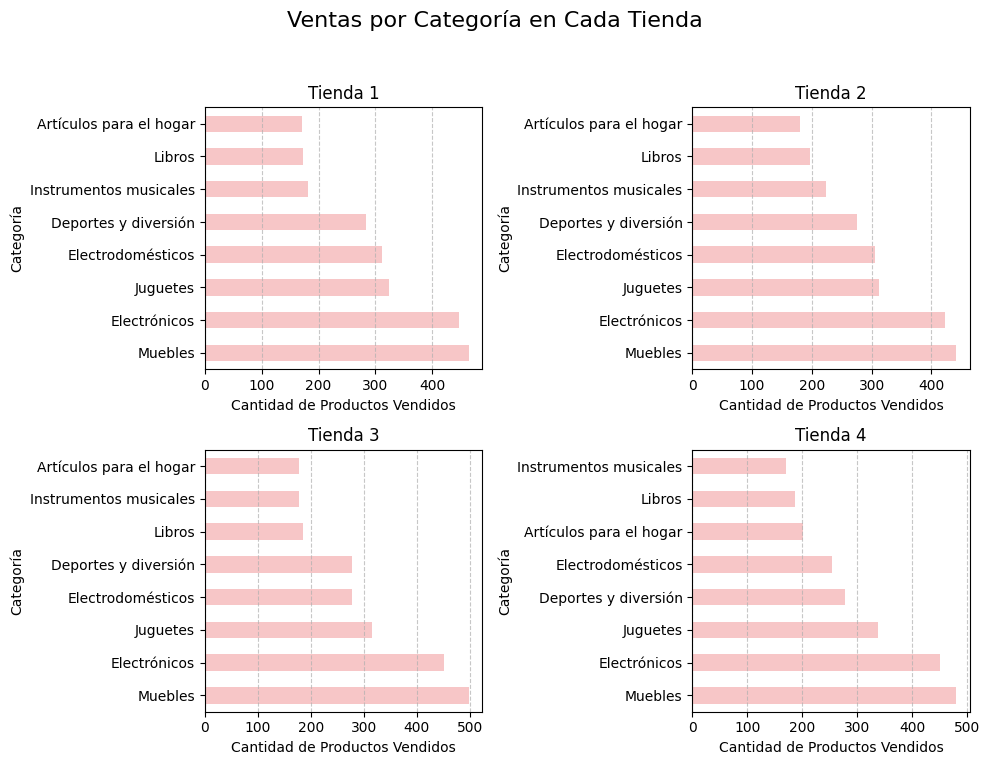

In [6]:
# Configurar figura con 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Ventas por Categoría en Cada Tienda', fontsize=16)

# Lista de datos y títulos
ventas = [ventas_categoria_t1, ventas_categoria_t2, ventas_categoria_t3, ventas_categoria_t4]
titulos = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Dibujar cada subplot
for i, ax in enumerate(axs.flat):
    ventas[i].plot(kind='barh', ax=ax, color='#F7C6C7')
    ax.set_title(titulos[i])
    ax.set_xlabel('Cantidad de Productos Vendidos')
    ax.set_ylabel('Categoría')
    ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar espacios y dejar sitio para el título
plt.show()

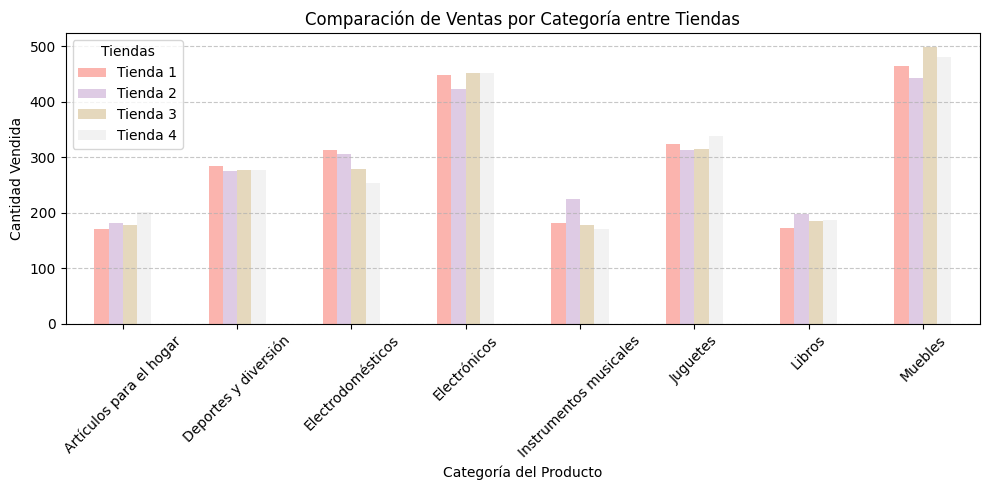

In [7]:
df_categorias = pd.DataFrame({
    'Tienda 1': ventas_categoria_t1,
    'Tienda 2': ventas_categoria_t2,
    'Tienda 3': ventas_categoria_t3,
    'Tienda 4': ventas_categoria_t4
}).fillna(0)

# Aseguramos que los valores sean enteros
df_categorias = df_categorias.astype(int)

# Crear gráfico de barras agrupadas
df_categorias.plot(kind='bar', figsize=(10, 5), colormap='Pastel1')

plt.title('Comparación de Ventas por Categoría entre Tiendas')
plt.xlabel('Categoría del Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tiendas')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [8]:
# Calcular calificación promedio por tienda
calificaciones = {
    'Tienda 1': tienda1['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}

for tienda, promedio in calificaciones.items():
    print(f"Calificación promedio {tienda}: {promedio:.2f}")

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


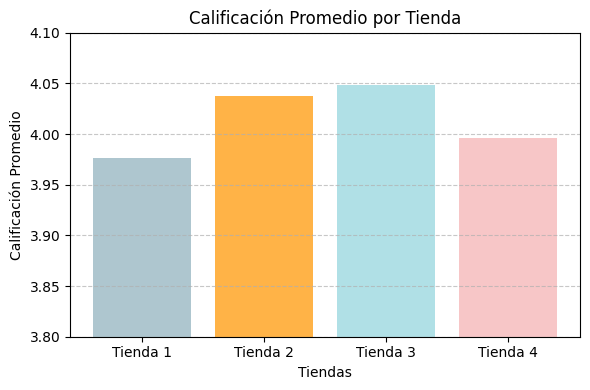

In [9]:
# Visualización de calificaciones promedio
colores = ['#AEC6CF', '#FFB347', '#B0E0E6', '#F7C6C7']
plt.figure(figsize=(6, 4))
plt.bar(calificaciones.keys(), calificaciones.values(), color=colores)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')
plt.ylim(3.8, 4.1)  # Ajuste del eje Y para mejor visualización
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [10]:
# Contar productos vendidos por nombre del producto
mas_vendidos_t1 = tienda1['Producto'].value_counts()
mas_vendidos_t2 = tienda2['Producto'].value_counts()
mas_vendidos_t3 = tienda3['Producto'].value_counts()
mas_vendidos_t4 = tienda4['Producto'].value_counts()

# Mostrar el más y el menos vendido (el primero y el último de la lista)
print("Tienda 1 - Más vendido:", mas_vendidos_t1.idxmax(), "-", mas_vendidos_t1.max(), "ventas")
print("Tienda 1 - Menos vendido:", mas_vendidos_t1.idxmin(), "-", mas_vendidos_t1.min(), "ventas\n")

print("Tienda 2 - Más vendido:", mas_vendidos_t2.idxmax(), "-", mas_vendidos_t2.max(), "ventas")
print("Tienda 2 - Menos vendido:", mas_vendidos_t2.idxmin(), "-", mas_vendidos_t2.min(), "ventas\n")

print("Tienda 3 - Más vendido:", mas_vendidos_t3.idxmax(), "-", mas_vendidos_t3.max(), "ventas")
print("Tienda 3 - Menos vendido:", mas_vendidos_t3.idxmin(), "-", mas_vendidos_t3.min(), "ventas\n")

print("Tienda 4 - Más vendido:", mas_vendidos_t4.idxmax(), "-", mas_vendidos_t4.max(), "ventas")
print("Tienda 4 - Menos vendido:", mas_vendidos_t4.idxmin(), "-", mas_vendidos_t4.min(), "ventas\n")

Tienda 1 - Más vendido: Microondas - 60 ventas
Tienda 1 - Menos vendido: Auriculares con micrófono - 33 ventas

Tienda 2 - Más vendido: Iniciando en programación - 65 ventas
Tienda 2 - Menos vendido: Juego de mesa - 32 ventas

Tienda 3 - Más vendido: Kit de bancas - 57 ventas
Tienda 3 - Menos vendido: Bloques de construcción - 35 ventas

Tienda 4 - Más vendido: Cama box - 62 ventas
Tienda 4 - Menos vendido: Guitarra eléctrica - 33 ventas



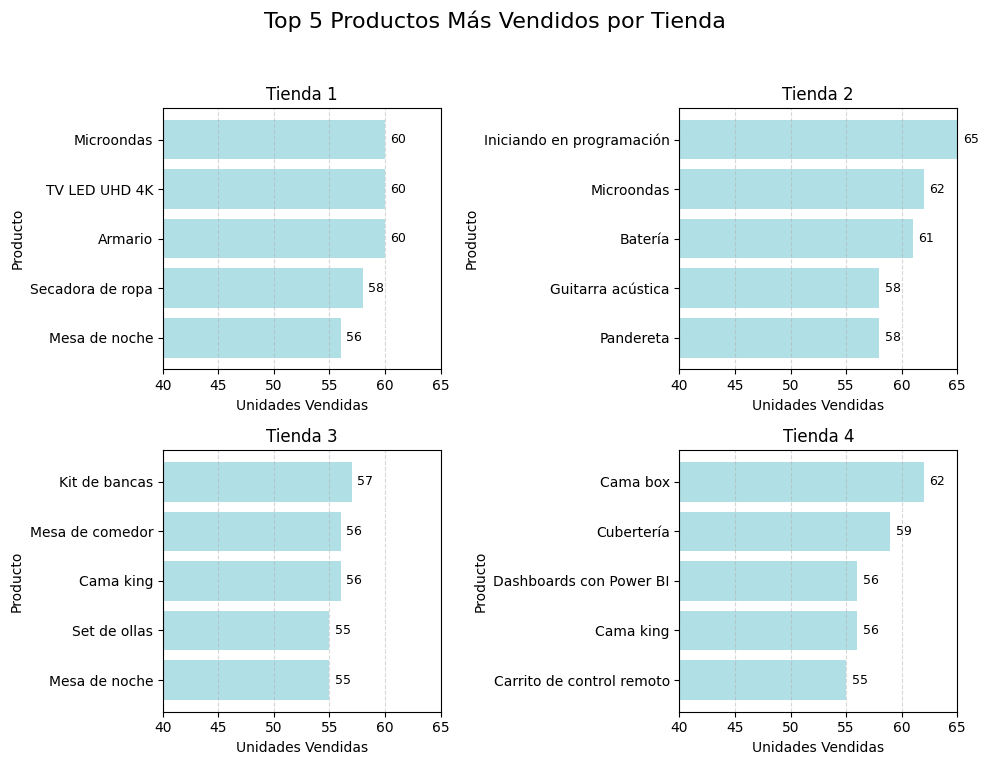

In [11]:
# TOP 5 productos más vendidos por tienda
top_5_t1 = mas_vendidos_t1.head(5)
top_5_t2 = mas_vendidos_t2.head(5)
top_5_t3 = mas_vendidos_t3.head(5)
top_5_t4 = mas_vendidos_t4.head(5)

# BOTTOM 5 productos menos vendidos por tienda
bottom_5_t1 = mas_vendidos_t1.tail(5)
bottom_5_t2 = mas_vendidos_t2.tail(5)
bottom_5_t3 = mas_vendidos_t3.tail(5)
bottom_5_t4 = mas_vendidos_t4.tail(5)

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Top 5 Productos Más Vendidos por Tienda', fontsize=16)

top_5_data = [top_5_t1, top_5_t2, top_5_t3, top_5_t4]
top_titles = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for i, ax in enumerate(axs.flat):
    datos = top_5_data[i]
    bars = ax.barh(datos.index, datos.values, color='#B0E0E6')

    # Etiquetas al final de cada barra
    for bar in bars:
        ancho = bar.get_width()
        ax.text(ancho + 0.5, bar.get_y() + bar.get_height()/2,
                f'{int(ancho)}', va='center', fontsize=9)

    ax.set_title(top_titles[i])
    ax.set_xlabel('Unidades Vendidas')
    ax.set_ylabel('Producto')
    ax.set_xlim(40, 65)
    ax.invert_yaxis()
    ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

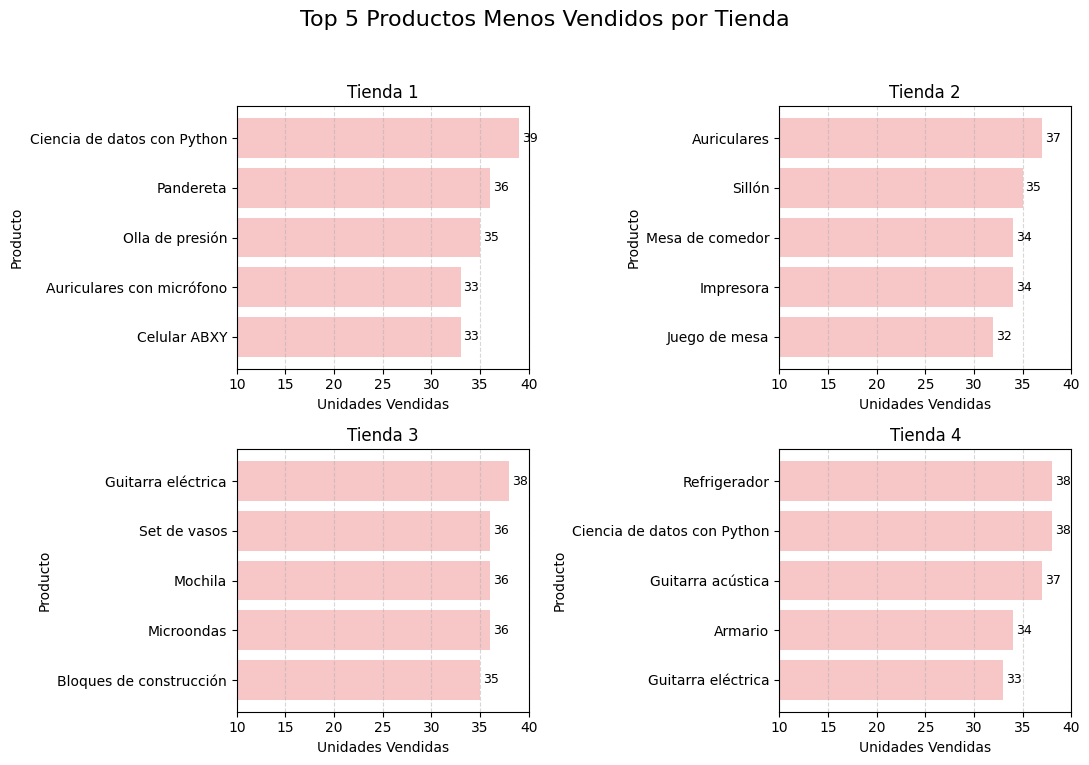

In [12]:
# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(11, 8))
fig.suptitle('Top 5 Productos Menos Vendidos por Tienda', fontsize=16)

bottom_5_data = [bottom_5_t1, bottom_5_t2, bottom_5_t3, bottom_5_t4]

for i, ax in enumerate(axs.flat):
    datos = bottom_5_data[i]
    bars = ax.barh(datos.index, datos.values, color='#F7C6C7')

    # Etiquetas con el valor en cada barra
    for bar in bars:
        ancho = bar.get_width()
        ax.text(ancho + 0.3, bar.get_y() + bar.get_height()/2,
                f'{int(ancho)}', va='center', fontsize=9)

    ax.set_title(top_titles[i])
    ax.set_xlabel('Unidades Vendidas')
    ax.set_ylabel('Producto')
    ax.set_xlim(10, 40)
    ax.invert_yaxis()
    ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 5. Envío promedio por tienda

In [13]:
# Calcular valor promedio del envío por tienda
envio_promedio = {
    'Tienda 1': tienda1['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

# Mostrar resultados con 2 decimales
for tienda, valor in envio_promedio.items():
    print(f"Envío promedio {tienda}: ${valor:.2f}")

Envío promedio Tienda 1: $26018.61
Envío promedio Tienda 2: $25216.24
Envío promedio Tienda 3: $24805.68
Envío promedio Tienda 4: $23459.46


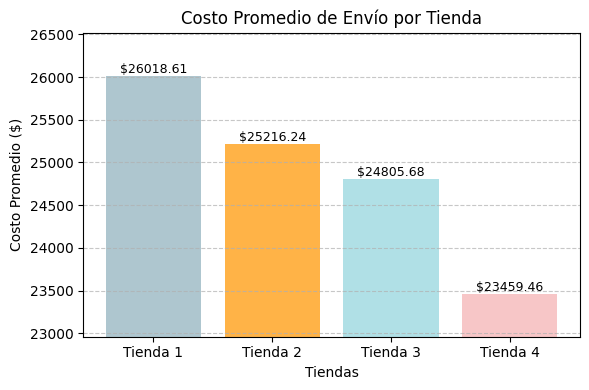

In [14]:
# Visualizar envío promedio por tienda

plt.figure(figsize=(6, 4))
bars = plt.bar(envio_promedio.keys(), envio_promedio.values(), color=colores)
plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costo Promedio ($)')
plt.ylim(min(envio_promedio.values()) - 500, max(envio_promedio.values()) + 500)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas de valor en cada barra
for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 0.1,
             f"${altura:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Graficos adicionales

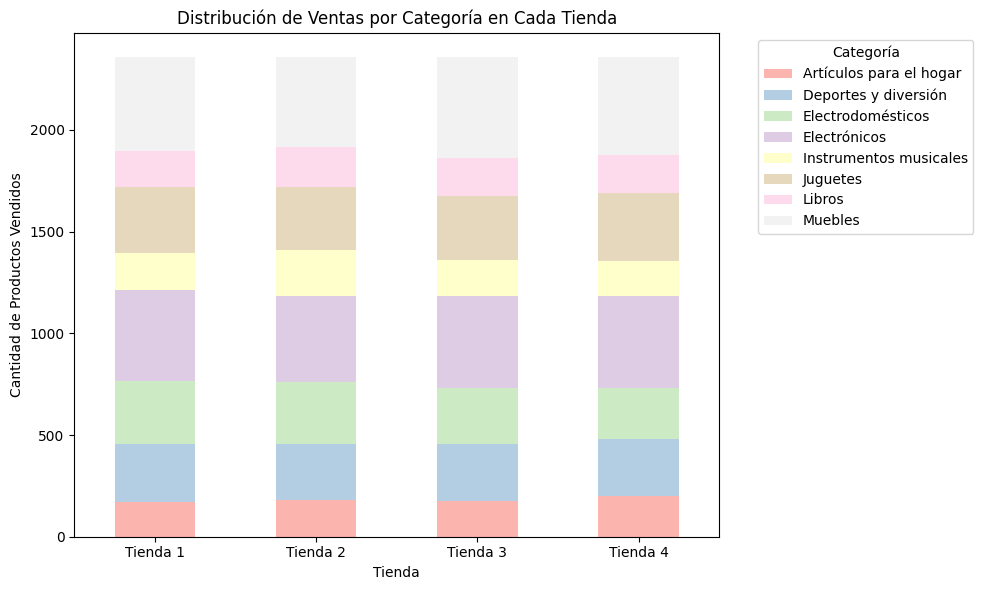

In [15]:
df_categorias.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel1')

plt.title('Distribución de Ventas por Categoría en Cada Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Productos Vendidos')
plt.xticks(rotation=0)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

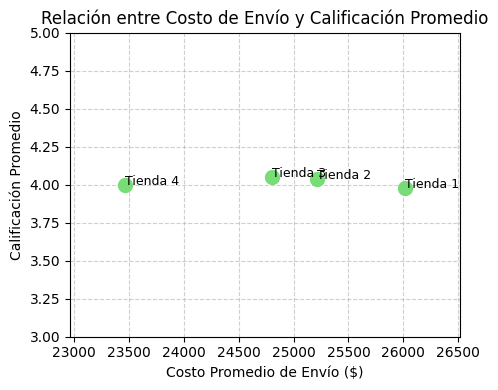

In [16]:
# Preparar los datos
tiendas = list(calificaciones.keys())
calif = list(calificaciones.values())
envio = list(envio_promedio.values())

plt.figure(figsize=(5, 4))
plt.scatter(envio, calif, color='#77DD77', s=100)

for i in range(len(tiendas)):
    plt.text(envio[i] + 0.1, calif[i], tiendas[i], fontsize=9)

plt.title('Relación entre Costo de Envío y Calificación Promedio')
plt.xlabel('Costo Promedio de Envío ($)')
plt.ylabel('Calificación Promedio')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(min(envio)-500, max(envio)+500)
plt.ylim(3, 5)
plt.tight_layout()
plt.show()

# **Recomendación Final para el Sr. Juan**
Después de analizar los datos de ventas, calificaciones de clientes, distribución de productos por categoría, productos más y menos vendidos, e incluso los costos promedio de envío, se concluye que:

La Tienda 3 es la menos eficiente del grupo y la recomendada para ser vendida.

**Justificación basada en los datos:**
Ingresos Totales Bajos:
La Tienda 3 presenta uno de los niveles más bajos de facturación total en comparación con las otras tres tiendas, lo que indica menor rentabilidad directa.

**Diversidad limitada en categorías:**
En el análisis de categorías, Tienda 3 muestra una concentración de ventas en pocas categorías, lo cual reduce su flexibilidad comercial y su atractivo a distintos tipos de clientes.

**Calificación promedio moderada:**
Aunque no es la peor, la calificación de los clientes en Tienda 3 no destaca respecto a las demás, lo que sugiere un nivel de satisfacción aceptable, pero no sobresaliente.

**Productos menos vendidos en mayor proporción:**
Esta tienda presenta un mayor número de productos con muy bajo nivel de ventas, lo cual indica una baja rotación de inventario y posibles problemas de selección de productos.

# **Conclusión general:**
Con base en estos indicadores, mantener la Tienda 3 representaría conservar la operación menos eficiente de la cadena. Vender esta tienda permitiría al Sr. Juan enfocar su inversión y recursos en unidades más rentables y con mejor percepción del cliente, fortaleciendo así el futuro del nuevo emprendimiento.


Adicional

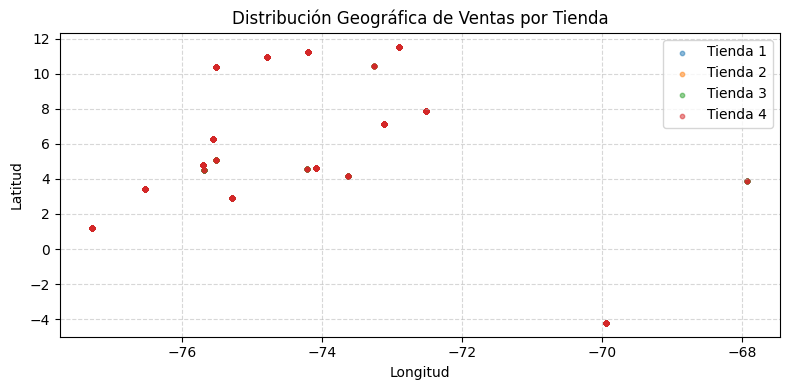

In [18]:
plt.figure(figsize=(8, 4))

plt.scatter(tienda1['lon'], tienda1['lat'], alpha=0.5, label='Tienda 1', s=10)
plt.scatter(tienda2['lon'], tienda2['lat'], alpha=0.5, label='Tienda 2', s=10)
plt.scatter(tienda3['lon'], tienda3['lat'], alpha=0.5, label='Tienda 3', s=10)
plt.scatter(tienda4['lon'], tienda4['lat'], alpha=0.5, label='Tienda 4', s=10)

plt.title('Distribución Geográfica de Ventas por Tienda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

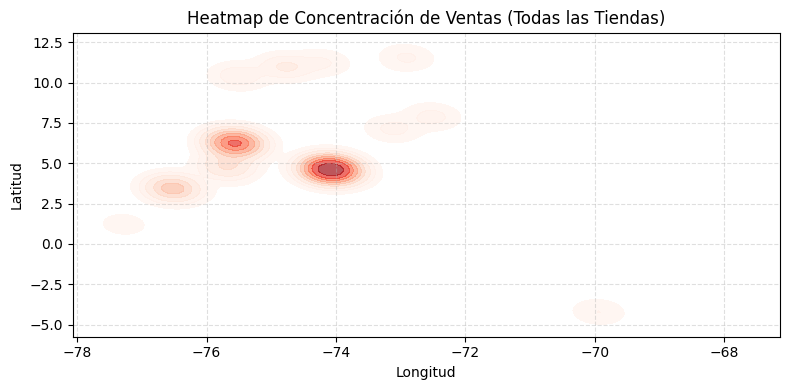

In [20]:
import seaborn as sns

# Unimos todos los datos en un solo DataFrame
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'
datos_geo = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Heatmap de densidad
plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=datos_geo, x="lon", y="lat",
    fill=True, cmap="Reds", alpha=0.7, thresh=0.05
)
plt.title("Heatmap de Concentración de Ventas (Todas las Tiendas)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Análisis Geográfico de Ventas
 1. Distribución de Ventas por Tienda (Gráfico de dispersión)
El gráfico de dispersión revela que:

Tienda 4 concentra la mayoría de sus ventas en un rango estrecho de coordenadas, con fuerte presencia en regiones del norte del país.

Tienda 3 muestra una dispersión geográfica baja, con menor presencia en regiones clave, lo que puede estar afectando su rendimiento.

Tienda 1 y Tienda 2 tienen ventas más distribuidas y bien representadas en zonas densamente pobladas.

 2. Heatmap General (Mapa de concentración de ventas)
El heatmap indica:

Las zonas con mayor concentración de ventas están entre longitudes -76 y -74, y latitudes 4 a 6, lo que sugiere zonas urbanas activas (probablemente Bogotá y alrededores).

Se observan algunos puntos de calor hacia el norte y el centro del país, donde hay más densidad de población.

Hay poca actividad comercial en zonas con menor densidad de población o apartadas geográficamente.

 Conclusión geográfica
La distribución geográfica de las ventas refuerza la decisión de vender la Tienda 3, ya que esta tienda tiene una presencia limitada en las regiones de mayor densidad comercial y no capitaliza zonas de alta demanda. En contraste, las otras tiendas muestran una mayor dispersión estratégica o concentran sus ventas en zonas más competitivas.

Esta limitación geográfica probablemente esté afectando negativamente el volumen de ventas, la diversidad de clientes y el rendimiento general de la tienda.